<a id='section_id'></a>

<h1> <div align="center"><a> Защита персональных данных клиентов </a></div>

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("/datasets/insurance.csv")
display(df.head())
df.info()
display(df.describe())
display(f'Количество дубликатов: {df.duplicated().sum()}')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


'Количество дубликатов: 153'

**Основные выводы анализа исходных данных:**
- Таблица имеет 5000 строк и 5 столбцов. Пропущенных значений нет.
- В массиве представлены исключительно количественные признаки с типами данных int и float. Столбцы с типом данных float можно заменить на int, поскольку данные принимают только целочисленное значение.
- Обнаружено 153 повторяющихся строк. 
- Статистических выбросов не обнаружено.

In [3]:
#выведем полный список строк, которые имеют дубликаты, для удобства отсортируем их по зарплате
df[df.duplicated(keep=False)].sort_values(by='Зарплата').head(10)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
2955,1,32.0,21600.0,0,0
2988,1,32.0,21600.0,0,0
361,0,50.0,24700.0,1,2
2869,0,50.0,24700.0,1,2
333,0,32.0,25600.0,1,0
4230,0,32.0,25600.0,1,0
1378,0,36.0,26400.0,0,0
2723,0,36.0,26400.0,0,0
1002,1,34.0,26900.0,0,0
1140,1,34.0,26900.0,0,0


In [4]:
#заменим тип данных и удалим дубликаты
df['Возраст'] = df['Возраст'].astype("int")
df['Зарплата'] = df['Зарплата'].astype("int")
df = df.drop_duplicates().reset_index(drop=True)
df.info()
display(f'Количество дубликатов: {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 189.5 KB


'Количество дубликатов: 0'

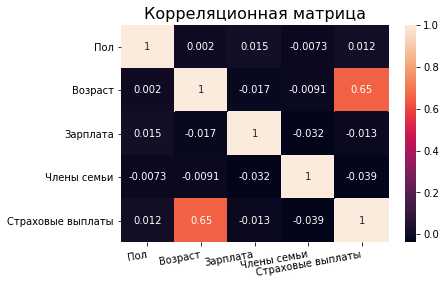

In [5]:
g = sns.heatmap(df.corr(),annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation=10, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.axes.set_title("Корреляционная матрица", fontsize=16)
plt.show()

Мы наблюдаем довольно сильную связь между целевым признаком и возрастом, что вполне логично, принимая во внимание, что мы рассматриваем данные страховой компании. Мультиколлинеарности признаков не обнаружено. Изучим распределение признаков.

In [6]:
df["Пол"].value_counts(normalize=True)

0    0.501547
1    0.498453
Name: Пол, dtype: float64

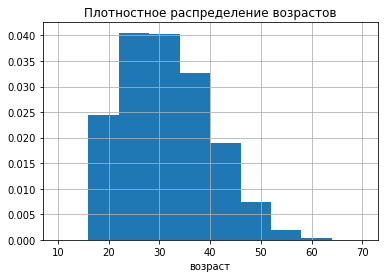

In [7]:
x = df["Возраст"].hist(bins=10, range=(10, 70), density=True)
plt.xlabel('возраст')
plt.title("Плотностное распределение возрастов")
plt.show()

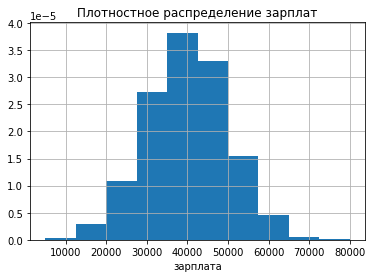

In [8]:
x = df["Зарплата"].hist(bins=10, range=(5000, 80000), density=True)
plt.xlabel('зарплата')
plt.title("Плотностное распределение зарплат")
plt.show()

1    0.360635
0    0.301424
2    0.214153
3    0.090159
4    0.025583
5    0.006602
6    0.001444
Name: Члены семьи, dtype: float64

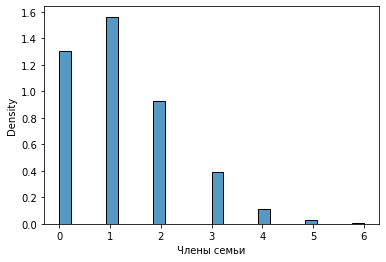

In [9]:
sns.histplot(df["Члены семьи"], stat="density")
df["Члены семьи"].value_counts(normalize=True)

Основные выводы по анализу признаков:
 - обнаружена связь между целевым признаком и возрастом (коэффициент корреляции 0.65);
 - доля мужчин и женщин одинаковая;
 - большая часть клиентов имеет возраст в диапазоне от 22 до 40 лет;
 - распределение зарплат близко к нормальному со средним значением 40 000 руб;
 - топ-3 по количеству членов семьи это пары (36%), одиночки (30%) и, возможно, пары с одним ребенком (21%)

## Умножение матриц

Ответьте на вопрос и обоснуйте решение. "Признаки умножают на **обратимую** матрицу. Изменится ли качество линейной регрессии?" 

* Изменится. Приведите примеры матриц.
* Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Ответим на этот вопрос, используя алгоритм обучения модели линенейной регрессии.

Обозначения:

- $X$ — прямоугольная матрица признаков

- $y$ — вектор целевого признака

- $P$ — квадртаная матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии
________________________________________________________________________________________________________________________________

Формула предсказания для исходной матрицы признаков X:
$$ ȳ = Xw $$

Формула обучения:
$$ w = (X^T X)^{-1} X^T y $$


Раскроем формулу предсказания:
$$ ȳ = X(X^T X)^{-1} X^T y $$ 
________________________________________________________________________________________________________________________________

Формула предсказания для преобразованной матрицы признаков XP:
$$ ȳ* = XPw* $$

Формула обучения:
$$ w* = ((XP)^T (XP))^{-1} (XP)^T y $$


Раскроем транспонирование матриц:
$$ w* = (X^T P^T XP)^{-1} X^TP^T y $$

Теперь раскроем скобки для произведения обратных матриц:
$$ w* = (X^T X)^{-1} (P^T)^{-1} P^{-1} X^TP^T y $$

Произведение матрицы на обратную к ней дает единичную матрицу, то есть можно сократить произведение матриц $(P^T)^{-1}P^T$:


Получаем:
$$ w* = (X^T X)^{-1} P^{-1} X^T y $$

Распишем предсказания по новым признакам с учетом полученной формулы:

$$ ȳ* = XP (X^T X)^{-1} P^{-1} X^T y $$

По свойству единичной матрицы также сократим произведение матриц $P(P)^{-1}$:

$$ ȳ* = X(X^TX)^{-1}  X^T y $$

Мы получили формулу для $ȳ*$, которая полностью совпадает с формулой для $ȳ$. Таким образом можно сделать вывод, что **при умножении признаков на обратимую матрицов качество модели линейной регрессии никак не изменится**.

Из формул выше можно также вывести **связь весовых коэффициентов для исходной и преобразованной матрицы**:
$$ w* = P^{-1}w$$


## Алгоритм преобразования

Для защиты данных клиентов умножим матрицу признаков на обратимую матрицу, которая будет сгенерирована случайным образом
  
Этапы алгоритма:
   1. Создание квадратной матрицы $R$ c необходимой рамерностью n, где n - количество признаков для регрессии;
   2. Проверка матрицы на обратимость;
   3. Получение преобразованной матрицы $M = X @ R$;
   4. Расчет метрики R2 для модели линейной регрессии для исходной и преобразованной матрицы;
   5. Восстановление исходной матрицы признаков. 
 
Выше было приведено доказательство, что при умножении признаков на обратимую матрицов качество модели линейной регрессии никак не изменится.

## Проверка алгоритма

In [10]:
# объявим переменные с признаками и целевым признаком, определим количество признаков
X = df.drop(['Страховые выплаты'], axis = 1)
y = df['Страховые выплаты']
print("Количество признаков исходной матрицы = ", X.shape[1])

Количество признаков исходной матрицы =  4


In [11]:
#сгенерируем случайную обратимую матрицу размерностью nxn, которую можно будет легко восстановить, зная seed
np.random.seed(12345)
R = np.random.random(size=(X.shape[1], X.shape[1]))
R

array([[0.92961609, 0.31637555, 0.18391881, 0.20456028],
       [0.56772503, 0.5955447 , 0.96451452, 0.6531771 ],
       [0.74890664, 0.65356987, 0.74771481, 0.96130674],
       [0.0083883 , 0.10644438, 0.29870371, 0.65641118]])

In [12]:
#убедимся, что полученная матрица обратима
np.linalg.inv(R)

array([[ 2.1336149 ,  0.5051926 , -1.71113385,  1.33832486],
       [-3.76534462, -2.61352053,  6.72316006, -6.07193701],
       [ 0.97426298,  2.9928115 , -3.49875049,  1.84220045],
       [ 0.13998298, -0.94454066,  0.52375812,  1.652661  ]])

In [13]:
#умножим исходную матрицу признаков на обратимую матрицу 
M = X @ R
M.head()

,0,1,2,3
0,37169.983952,32441.905747,37126.682258,47708.455342
1,28484.575966,24863.156593,28457.829124,36560.358528
2,15743.503414,13742.238084,15729.981916,20206.383593
3,31241.345787,27266.582942,31200.559759,40101.520436
4,19563.289157,17075.165256,19542.546847,25108.599330


**Обновленная матрица полностью потеряла исходные признаки, данные клиентов защищены**

In [14]:
#Поскольку в sklearn для всех моделей регрессии метрика по умолчанию R2,можно сразу получить ее значение,
#не используя методы fit и predict. Рассчитаем коэффициент детерминации для исходной матрицы признаков.
lr = LinearRegression()
r2 = cross_val_score(lr, X, y, cv=5, n_jobs=-1).mean()
print("R2_score для исходной матрицы = ", r2)

R2_score для исходной матрицы =  0.42779425809789445


In [15]:
#Сравним данную метрику для преобразованной матрицы.
lr = LinearRegression()
r2 = cross_val_score(lr, M, y, cv=5, n_jobs=-1).mean()
print("R2_score для  преобразованной матрицы = ", r2)

R2_score для  преобразованной матрицы =  0.42779425809786975


**Метрики R2 для модели с исходной и преобразованной матрицы признаков совпадают вплоть до 12 знака после запятой. А чтобы получить исходную матрицу признаков достаточно преобразованную матрицу умножить на обратную матрицу к той, на которую умножались признаки.**

In [16]:
#восстановим исходную матрицу, используя нужный seed
np.random.seed(12345)
Ṙ = np.random.random(size=(X.shape[1], X.shape[1]))
display(f'Проверка идентичности обратимых матрицы: {np.array_equal(R, Ṙ)}')
      
Ẋ = M @ np.linalg.inv(Ṙ)
display("Исходная матрица признаков", 
        X.head(),
        "Восстановленная матрица признаков",
        np.around(Ẋ).head())

display(f'Проверка идентичности матрицы признаков: {np.array_equal(X, np.around(Ẋ))}')

'Проверка идентичности обратимых матрицы: True'

'Исходная матрица признаков'

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600,1
1,0,46,38000,1
2,0,29,21000,0
3,0,21,41700,2
4,1,28,26100,0


'Восстановленная матрица признаков'

,0,1,2,3
0,1.0,41.0,49600.0,1.0
1,0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,0.0
3,0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,0.0


'Проверка идентичности матрицы признаков: True'

**По итогам работы предложенного алгоритма мы убедились, что выполненые ключевые требования задачи:**
  - после умножения на обратимую матрицу исходные признаки полностью утеряны (данные клиентов защищены);
  - обновленная матрица признаков позволяет обучать модель линейной регрессии без потери качества;
  - матрица исходных признаком может быть восстановлена при наличии правильного seed.